# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
def dfdx(f, x, h=1e-5):
  return (f(x+h) - f(x)) / h

In [ ]:
import torch as th

In [ ]:
def f(x):
  return x**2

In [ ]:
x = th.tensor(5.0, requires_grad=True)
y = f(x)
# z = y + 5
# t = z * 2
y.backward()
x.grad

tensor(10.)

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
z = y.sum() # x1**2 + x2**2 + x3**2
z.backward()
x.grad # [dz/dx1 dz/dx2 dz/dx3]

tensor([ 0.,  9., 18.])

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
y.backward(th.ones_like(x))
x.grad

tensor([ 0.,  9., 18.])

In [ ]:
x1, x2, x3 = x
J = th.tensor([
    [2*x1, 0, 0],
    [0, 2*x2, 0],
    [0, 0, 2*x3]
])
v = th.ones_like(x)
J.T @ v

tensor([ 0.,  9., 18.])

## Задачи для самостоятельного решения

In [ ]:
import sympy as sp
import torch as th
import matplotlib.pyplot as plt
import numpy as np

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
def f(x):
  return np.sin(x) / (np.log(x) + 1)

def df(x):
  return -(np.sin(x) - x*np.cos(x)*np.log(x) - x*np.cos(x)) / (x*np.log(x)**2 + 2*x*np.log(x) + x)

In [ ]:
x = np.linspace(0, 10, 1000)[1:]
zn_f = f(x)
zn_df = df(x)

In [ ]:
def draw(x, zn_f, zn_df):
  fig, ax = plt.subplots()
  ax.plot(x, zn_f, color='red')
  ax.plot(x, zn_df, color='green')
  plt.grid()
  plt.ylim([-10, 10])
  plt.show();

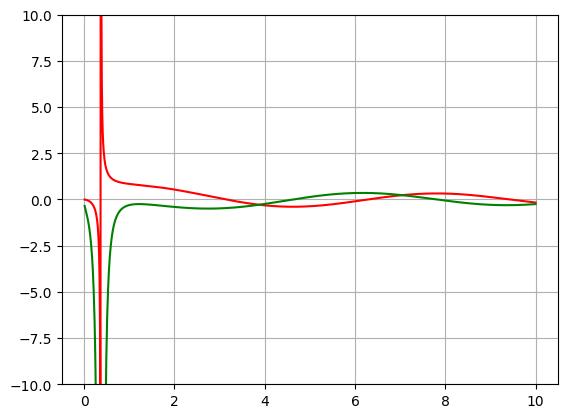

In [ ]:
draw(x, zn_f, zn_df);

2\. Дана функция $f(x)$. Найдите (используя символьные вычисления) производную данной функции $f'(x)$. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
x = sp.symbols('x')
X = np.linspace(0, 10, 50)[1:]
func = sp.sin(x) / (sp.ln(x) + 1)
d_func = sp.diff(func)
d_func

cos(x)/(log(x) + 1) - sin(x)/(x*(log(x) + 1)**2)

In [ ]:
zn_f = []
zn_df = []
for i in np.linspace(0, 10, 1000)[1:]:
  if i == 0:
    continue
  else:
    zn_f.append(func.subs(x, i))
    zn_df.append(d_func.subs(x, i))

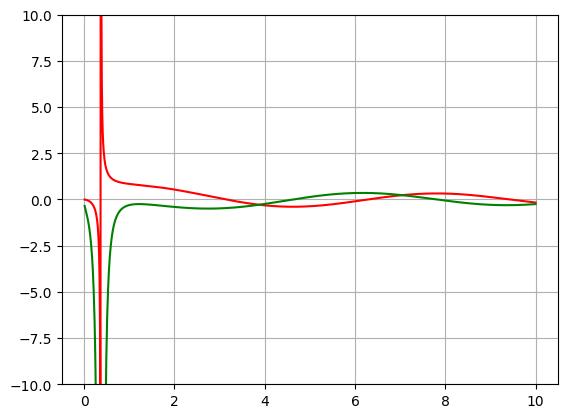

In [ ]:
draw(np.linspace(0, 10, 1000)[1:], zn_f, zn_df);

3\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
def dfdx(f, x, h=1e-5):
  return (f(x+h) - f(x)) / h

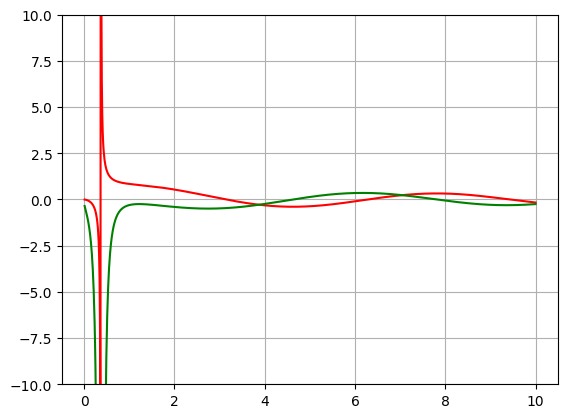

In [ ]:
X = np.linspace(0, 10, 1000)[1:]
z_f = f(X)
z_df = dfdx(f, X)
draw(X, z_f, z_df);

4\. Найдите локальный минимум функции $f(x)$ при помощи метода градиетного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
x = 0
x_cur = 4
lam = 0.001
while abs(x_cur - x) > 1e-6:
  x = x_cur
  x_cur = x_cur - lam * dfdx(f, x_cur)

print(f'Локальный минимум {f(x_cur):.4f}, x = {x_cur:.4f}')

Локальный минимум -0.3935, x = 4.6247


In [ ]:
x = 0
x_cur = 9
lam = 0.001
while abs(x_cur - x) > 1e-6:
  x = x_cur
  x_cur = x_cur + lam * dfdx(f, x_cur)

print(f'Локальный максимум {f(x_cur):.4f}, x = {x_cur:.4f}')

Локальный максимум 0.3270, x = 7.8152


5\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
def f_th(x):
  return th.sin(x) / (th.log(x) + 1)

In [ ]:
X = th.linspace(0, 10, steps=1000, requires_grad=True)[1:]
y = f_th(X)
X.retain_grad()
y.backward(th.ones_like(X))
z_df_th = X.grad

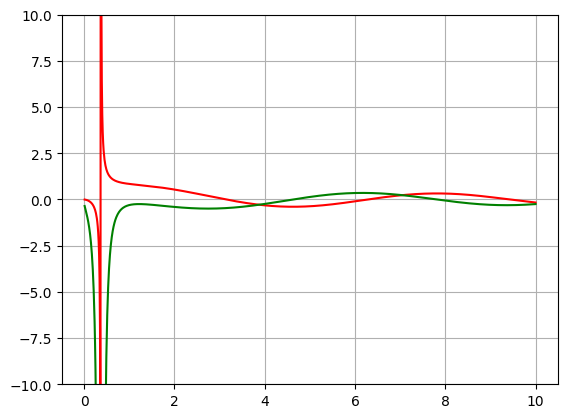

In [ ]:
draw(X.detach().numpy(), z_f, z_df_th)

6\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

In [ ]:
def f_6(x):
  return th.sin(th.cos(x))

def dfdx_6(x):
  return - np.cos(np.cos(x)) * np.sin(x)

In [ ]:
X = np.linspace(0, 10, 100)
X_th = th.linspace(0, 10, 100, requires_grad=True)
z_ydx = dfdx_6(X)
y = f_6(X_th)
y.backward(th.ones_like(X_th))
z_ydx_th = X_th.grad

In [ ]:
# Средняя ошибка результатов
np.abs(z_ydx_th.numpy() - z_ydx).mean()

8.48695920820184e-08